# Structure functions with 2D data

This example will guide you through each step necessary to compute velocity- and vorticity-based structure functions from a 2D simulation of surface ocean velocity. 

**General procedure:**

1. Load a dataset generated with GeophysicalFlows.jl
2. Format the dataset
3. Calculate velocity-based and scalar-based structure functions for the zonal and meridional directions as a function of separation distance
4. Plot the structure functions as a function of separation distance

In [1]:
import matplotlib_inline.backend_inline
import seaborn as sns

sns.set_style(style="white")
sns.set_context("talk")

matplotlib_inline.backend_inline.set_matplotlib_formats("png", dpi=200)

## Load the dataset generated with GeophysicalFlows.jl
We will use `h5py` to load a `.jld2` file, the output from [GeophysicalFlows.jl](https://fourierflows.github.io/GeophysicalFlowsDocumentation/stable/), a numerical ocean simulator written in Julia.

In [2]:
import h5py
   
f = h5py.File('example_data/2layer_128.jld2', 'r')
grid = f['grid']
snapshots = f['snapshots']

# Initialize the grid of x and y coordinates
x = grid['x'][()]
y = grid['y'][()]

# Grab the top layer and final snapshot of the simulation for u, v, and q
u = snapshots['u']['20050'][0]
v = snapshots['v']['20050'][0]
q = snapshots['q']['20050'][0]

Make a couple of quick plots to see the velocity fields.

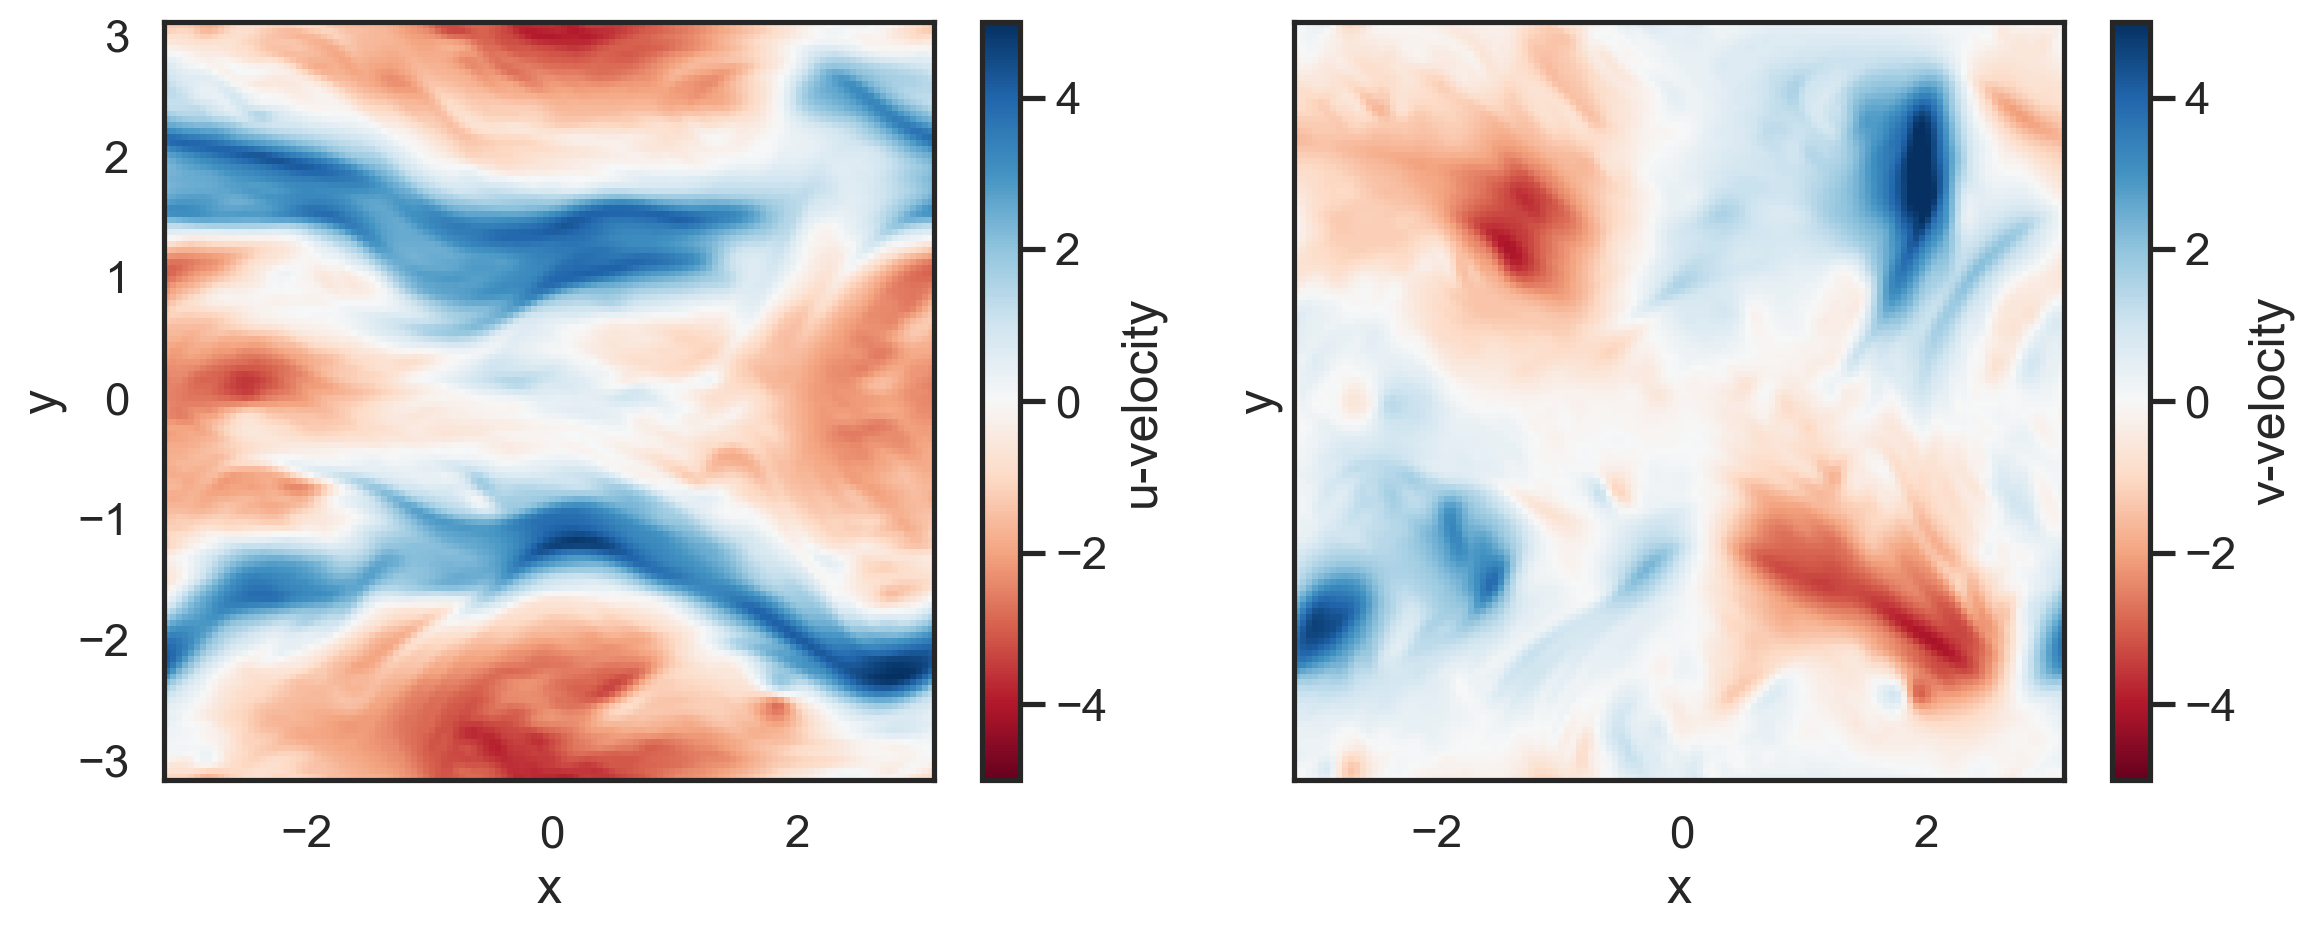

In [3]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1,2, sharex=True, sharey=True, figsize=(12,5))
p1 = ax1.pcolormesh(x,y,u, cmap='RdBu',vmin=-5,vmax=5)
p2 = ax2.pcolormesh(x,y,v, cmap='RdBu',vmin=-5,vmax=5)
fig.colorbar(p1,label='u-velocity')
fig.colorbar(p2, label='v-velocity')
ax1.set_xlabel('x')
ax2.set_xlabel('x')
ax1.set_ylabel('y')
ax2.set_ylabel('y')
plt.tight_layout()

## Calculate advective velocity structure functions
By default `fluidsf.generate_structure_functions` will generate the advective velocity-based structure function. 

In [4]:
import fluidsf

sf = fluidsf.generate_structure_functions(u, v, x, y)

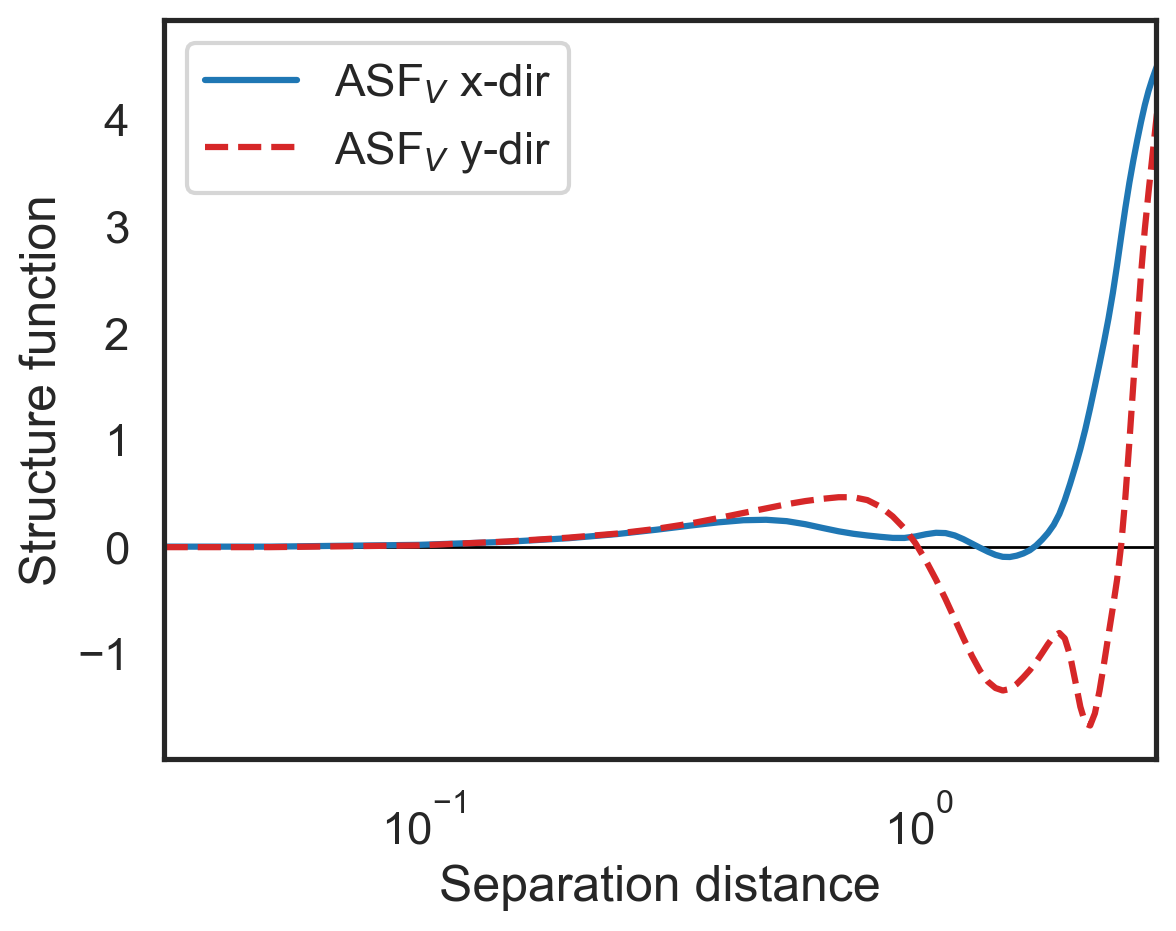

In [5]:
fig, (ax1) = plt.subplots()


ax1.semilogx(sf['x-diffs'], sf['SF_advection_velocity_x'],
             label=r'ASF$_V$ x-dir',color='tab:blue')
ax1.semilogx(sf['y-diffs'], sf['SF_advection_velocity_y'], 
             label=r'ASF$_V$ y-dir',
             color='tab:red',linestyle='dashed')

ax1.set_ylabel(r"Structure function")
ax1.set_xlabel(r"Separation distance")
ax1.set_xlim(3e-2,3e0)
ax1.legend()
plt.hlines(0,3e-2,3e0,color='k',lw=1,zorder=0)

## Calculating scalar-based structure functions and traditional structure functions
We can repeat the above steps with additional inputs to calculate advective structure functions from scalar fields as well as traditional structure functions. 

**Note:** we now add `"ASF_V"` to the list given to `sf_type` because otherwise the advective velocity structure function will be skipped.

In [6]:
sf_all = fluidsf.generate_structure_functions(
    u,
    v,
    x,
    y,
    sf_type=["ASF_V", "ASF_S", "LLL", "LL", "LTT", "LSS"],
    scalar=q,
)

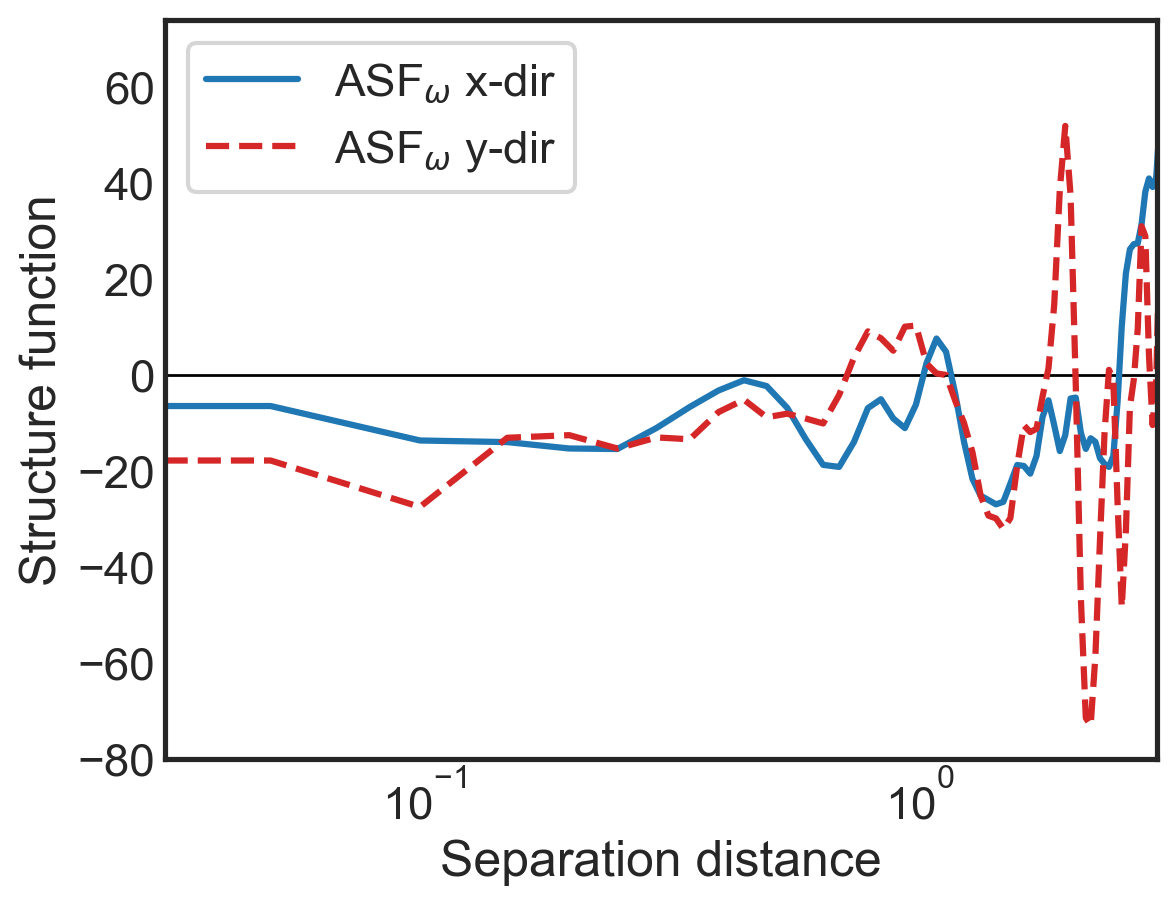

In [7]:
fig, (ax1) = plt.subplots()


ax1.semilogx(sf_all['x-diffs'], sf_all['SF_advection_scalar_x'],
             label=r'ASF$_{\omega}$ x-dir',
             color='tab:blue')
ax1.semilogx(sf_all['y-diffs'], sf_all['SF_advection_scalar_y'], 
             label=r'ASF$_{\omega}$ y-dir',
             color='tab:red', linestyle='dashed')

ax1.set_ylabel(r"Structure function")
ax1.set_xlabel(r"Separation distance")
ax1.set_xlim(3e-2,3e0)
ax1.legend()
plt.hlines(0,3e-2,3e0,color='k',lw=1,zorder=0)
ax1.tick_params(direction="in", which="both")
ax1.xaxis.get_ticklocs(minor=True)
ax1.minorticks_on()

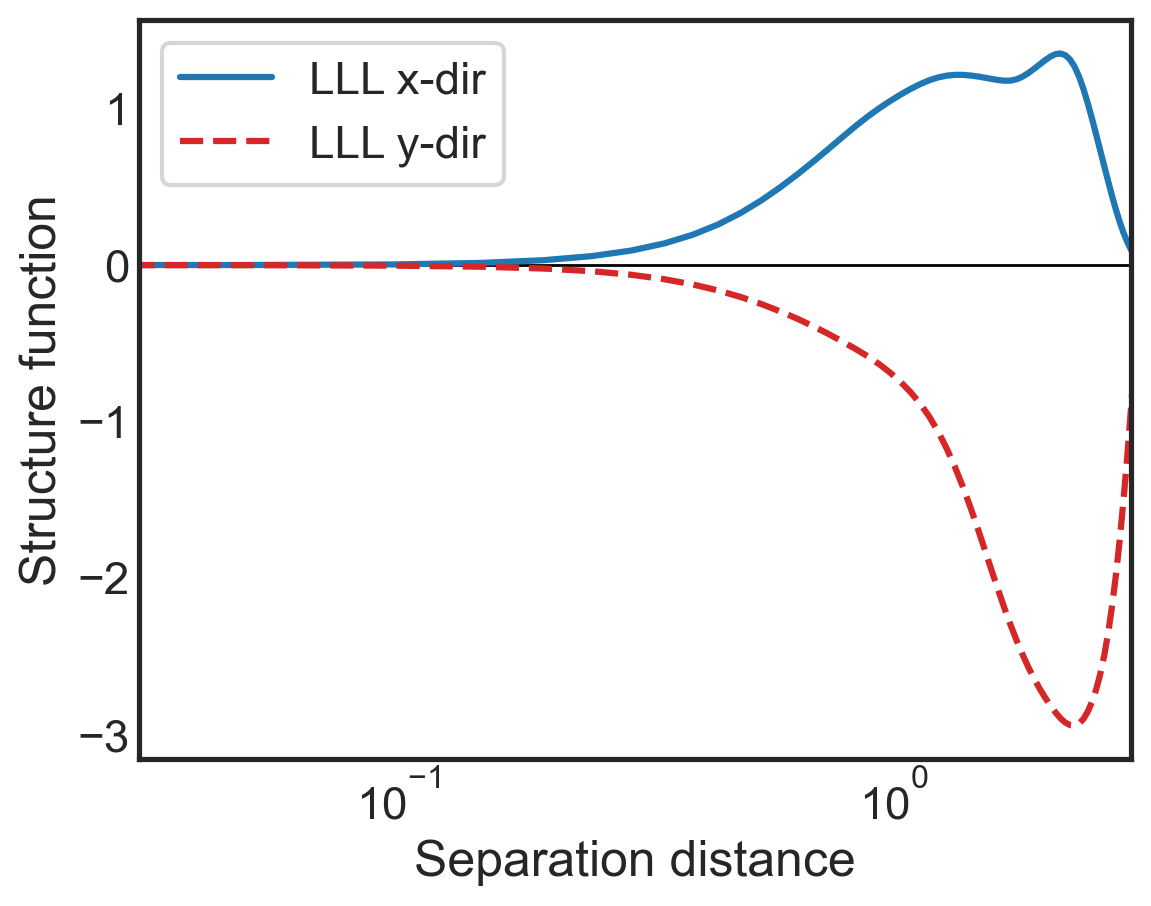

In [8]:
fig, (ax1) = plt.subplots()


ax1.semilogx(sf_all['x-diffs'], sf_all['SF_LLL_x'],
             label=r'LLL x-dir',
             color='tab:blue')
ax1.semilogx(sf_all['y-diffs'], sf_all['SF_LLL_y'], 
             label=r'LLL y-dir',
             color='tab:red',linestyle='dashed')

ax1.set_ylabel(r"Structure function")
ax1.set_xlabel(r"Separation distance")
ax1.set_xlim(3e-2,3e0)
ax1.legend()
plt.hlines(0,3e-2,3e0,color='k',lw=1,zorder=0)
ax1.tick_params(direction="in", which="both")
ax1.xaxis.get_ticklocs(minor=True)
ax1.minorticks_on()

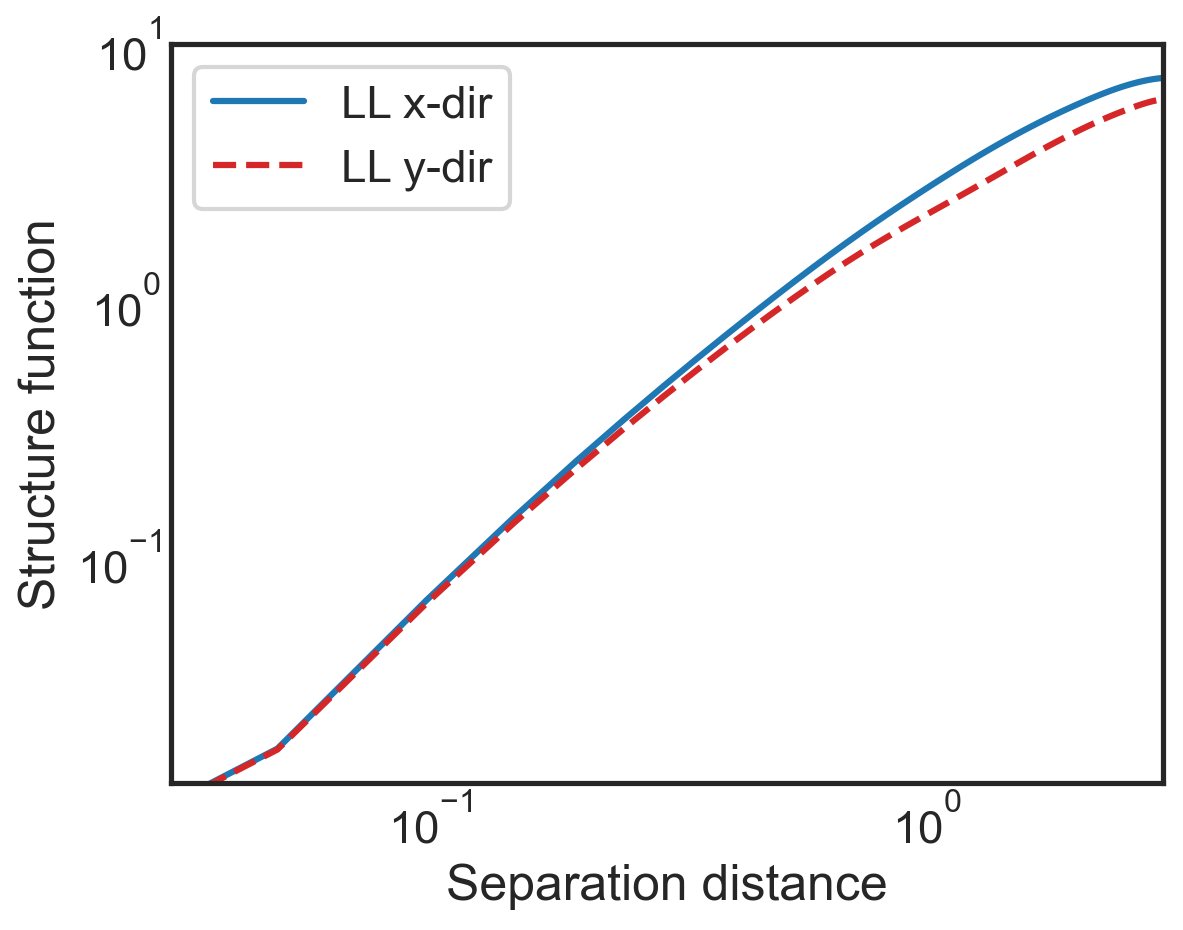

In [9]:
fig, (ax1) = plt.subplots()


ax1.loglog(sf_all['x-diffs'], sf_all['SF_LL_x'],
             label=r'LL x-dir',
             color='tab:blue')
ax1.loglog(sf_all['y-diffs'], sf_all['SF_LL_y'], 
             label=r'LL y-dir',
             color='tab:red',linestyle='dashed')

ax1.set_ylabel(r"Structure function")
ax1.set_xlabel(r"Separation distance")
ax1.set_xlim(3e-2,3e0)
ax1.legend()
plt.hlines(0,3e-2,3e0,color='k',lw=1,zorder=0)
ax1.tick_params(direction="in", which="both")
ax1.xaxis.get_ticklocs(minor=True)
ax1.minorticks_on()

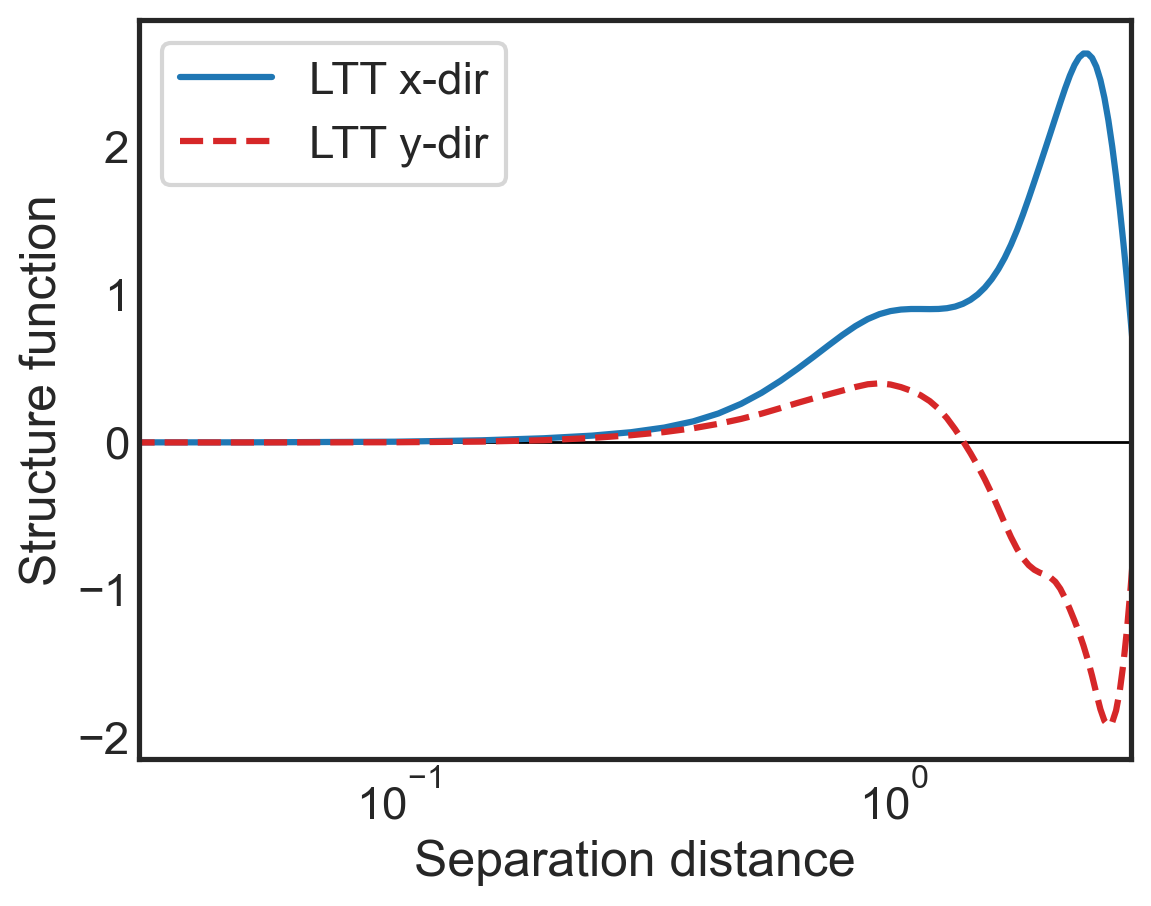

In [10]:
fig, (ax1) = plt.subplots()


ax1.semilogx(sf_all['x-diffs'], sf_all['SF_LTT_x'],
             label=r'LTT x-dir',
             color='tab:blue')
ax1.semilogx(sf_all['y-diffs'], sf_all['SF_LTT_y'], 
             label=r'LTT y-dir',
             color='tab:red',linestyle='dashed')

ax1.set_ylabel(r"Structure function")
ax1.set_xlabel(r"Separation distance")
ax1.set_xlim(3e-2,3e0)
ax1.legend()
plt.hlines(0,3e-2,3e0,color='k',lw=1,zorder=0)
ax1.tick_params(direction="in", which="both")
ax1.xaxis.get_ticklocs(minor=True)
ax1.minorticks_on()

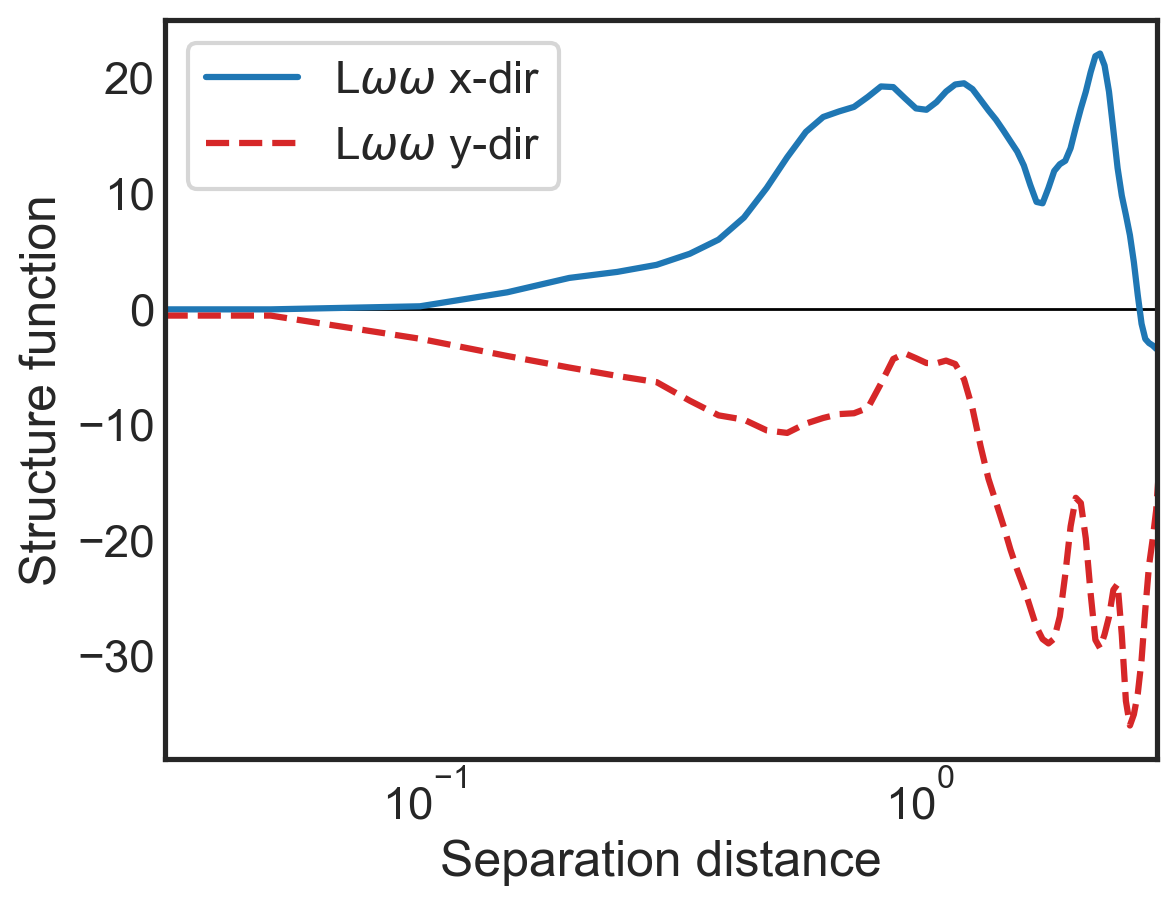

In [11]:
fig, (ax1) = plt.subplots()


ax1.semilogx(sf_all['x-diffs'], sf_all['SF_LSS_x'],
             label=r'L$\omega\omega$ x-dir',
             color='tab:blue')
ax1.semilogx(sf_all['y-diffs'], sf_all['SF_LSS_y'], 
             label=r'L$\omega\omega$ y-dir',
             color='tab:red', linestyle='dashed')

ax1.set_ylabel(r"Structure function")
ax1.set_xlabel(r"Separation distance")
ax1.set_xlim(3e-2,3e0)
ax1.legend()
plt.hlines(0,3e-2,3e0,color='k',lw=1,zorder=0)
ax1.tick_params(direction="in", which="both")
ax1.xaxis.get_ticklocs(minor=True)
ax1.minorticks_on()